# pima 糖尿病预测作业；
采用5折交叉验证，分别用log似然损失和正确率，对Logistic回归模型的正则超参数调优。

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. 读取数据

In [3]:
train = pd.read_csv('FE_pima-indians-diabetes.csv')
train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


## 数据探索与特征工程　见0_EDA_diabetes.ipynb、1_FE_diabetes.ipynb

## 2. 数据分割
训练集测试集8/2分;

In [4]:
from sklearn.model_selection import train_test_split
y = train['Target']
X = train.drop(['Target'], axis=1)

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

columns_name = X.columns

## 3.训练模型

In [5]:
from sklearn.linear_model import LogisticRegression

# 使用默认配置分类器
lr = LogisticRegression()

# 训练
lr.fit(X_train, y_train)

# 在测试集上测试
y_test_pred_lr = lr.predict(X_test)

# 模型权重
lr.coef_

array([[ 0.22643884,  1.11271133, -0.15100003,  0.07127163, -0.13534381,
         0.68116965,  0.20030869,  0.39982822]])

In [6]:
# 测试集腿硬预测值
lr.predict_proba(X_test)

array([[ 0.72467795,  0.27532205],
       [ 0.83113632,  0.16886368],
       [ 0.89155287,  0.10844713],
       [ 0.84420033,  0.15579967],
       [ 0.53548386,  0.46451614],
       [ 0.56388091,  0.43611909],
       [ 0.9857578 ,  0.0142422 ],
       [ 0.61390743,  0.38609257],
       [ 0.4226831 ,  0.5773169 ],
       [ 0.23730854,  0.76269146],
       [ 0.77577896,  0.22422104],
       [ 0.10685984,  0.89314016],
       [ 0.62260429,  0.37739571],
       [ 0.71779258,  0.28220742],
       [ 0.92077403,  0.07922597],
       [ 0.59422074,  0.40577926],
       [ 0.88638976,  0.11361024],
       [ 0.92525227,  0.07474773],
       [ 0.27360556,  0.72639444],
       [ 0.42024042,  0.57975958],
       [ 0.81137231,  0.18862769],
       [ 0.92324249,  0.07675751],
       [ 0.48342538,  0.51657462],
       [ 0.90485462,  0.09514538],
       [ 0.44079602,  0.55920398],
       [ 0.11326737,  0.88673263],
       [ 0.89180018,  0.10819982],
       [ 0.9704922 ,  0.0295078 ],
       [ 0.73685656,

In [7]:
# 查看各模型权重
fs = pd.DataFrame({'columns':list(columns_name), 'coef':list((lr.coef_.T))})
fs.sort_values(by=['coef'], ascending=False)

,coef,columns
1,[1.11271133094],Plasma_glucose_concentration
5,[0.681169645302],BMI
7,[0.399828217334],Age
0,[0.226438839584],pregnants
6,[0.200308689896],Diabetes_pedigree_function
3,[0.0712716268218],Triceps_skin_fold_thickness
4,[-0.135343807819],serum_insulin
2,[-0.15100002588],blood_pressure


## 4.模型评价

In [8]:
# 正确率评价
lr.score(X_test, y_test)

0.75324675324675328

In [9]:
# log似然损失评价
from sklearn.metrics import log_loss
log_loss(y_test, y_test_pred_lr)

8.5226434815773988

In [10]:
# 5折交叉验证
from sklearn.model_selection import cross_val_score
loss = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_log_loss')

print('logloss of each fold is:',-loss)

('logloss of each fold is:', array([ 0.51946855,  0.44590087,  0.48482846,  0.48318246,  0.46157091]))


## 5. 超参数调优

### logloss正则参数调优

In [11]:
from sklearn.model_selection import GridSearchCV

# 正则/参数范围
penaltys = ['l1', 'l2']
Cs = [0.1, 1, 10, 100, 1000]
tuned_para = dict(penalty = penaltys, C = Cs)

lr.set_params(solver='liblinear')
#这里用负log似然函数评价
grid = GridSearchCV(lr, tuned_para, cv=5,scoring='neg_log_loss')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=0)

In [12]:
print('best score:', -grid.best_score_)
print('best params:', grid.best_params_)

('best score:', 0.47873499895843319)
('best params:', {'penalty': 'l1', 'C': 1})


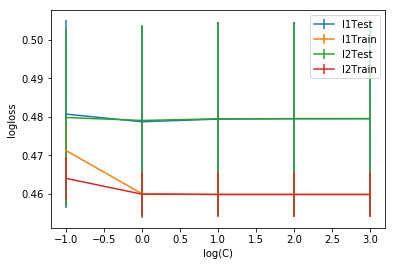

In [13]:
# CV误差曲线
test_means = grid.cv_results_['mean_test_score']
test_stds = grid.cv_results_['std_test_score']
train_means = grid.cv_results_['mean_train_score']
train_stds = grid.cv_results_['std_train_score']

#plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)

for i,value in enumerate(penaltys):
    plt.errorbar(x_axis, -test_scores[:,i], yerr=test_stds[:,i], label=penaltys[i]+'Test')
    plt.errorbar(x_axis, -train_scores[:,i], yerr=train_stds[:,i], label=penaltys[i]+'Train')
    
    
    
plt.legend()   
plt.xlabel('log(C)')
plt.ylabel('logloss')

plt.show()

### 正确率调优

In [34]:
from sklearn.linear_model import LogisticRegressionCV

# 正则/参数范围
penaltys = ['l1', 'l2']
Cs = [0.1, 1, 10, 100, 1000]


lr_cv = LogisticRegressionCV(penalty = 'l1', Cs = Cs, cv=5,scoring='accuracy', solver='liblinear')
#这里用正确率评价
lr_cv.fit(X_train, y_train)

LogisticRegressionCV(Cs=[0.1, 1, 10, 100, 1000], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1',
           random_state=None, refit=True, scoring='accuracy',
           solver='liblinear', tol=0.0001, verbose=0)

In [49]:
print('scores:', lr_cv.scores_[1][0])

('scores:', array([ 0.73387097,  0.73387097,  0.72580645,  0.72580645,  0.72580645]))


[ 0.36451613  0.40162602  0.37642276  0.37213115  0.39590164  0.          0.        ]


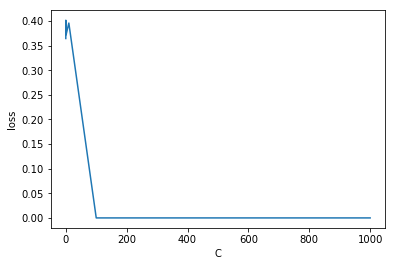

In [68]:
# scores_：dict with classes as the keys, and the values as the grid of scores obtained during cross-validating each fold,
# Each dict value has shape (n_folds, len(Cs))
Cs = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
n_Cs = len(Cs)
n_classes = 2
scores =  np.zeros((n_classes,n_Cs))


j = 0

for i in lr_cv.scores_[1]:
    scores[0][j] = np.mean(i,axis=0)
    j=j+1
    

mse_mean = np.mean(scores, axis = 0)
print mse_mean
plt.plot(Cs, mse_mean.reshape(n_Cs,1)) 
#plt(np.log10(reg.Cs)*np.ones(3), [0.28, 0.29, 0.30])
plt.xlabel('C')
plt.ylabel('loss')
plt.show()

#print ('C is:',lr_cv.C_)  #对多类分类问题，每个类别的分类器有一个C
